# Assignment 2: Applied Deep Learning

In [7]:
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [8]:
# Loading the datasets
train_df = pd.read_csv('../input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv')
test_df = pd.read_csv('../input/ahdd1/csvTestImages 10k x 784.csv')

train_label = pd.read_csv('../input/ahdd1/csvTrainLabel 60k x 1.csv')
test_label = pd.read_csv('../input/ahdd1/csvTestLabel 10k x 1.csv') 

In [9]:
train_df.shape, test_df.shape, train_label.shape, test_label.shape

((59999, 784), (9999, 784), (59999, 1), (9999, 1))

In [10]:
test_data = pd.concat( (test_df, test_label) , axis=1)
train_data = pd.concat((train_df, train_label), axis=1)

test_data.shape, train_data.shape

((9999, 785), (59999, 785))

Text(0.5, 1.0, '9')

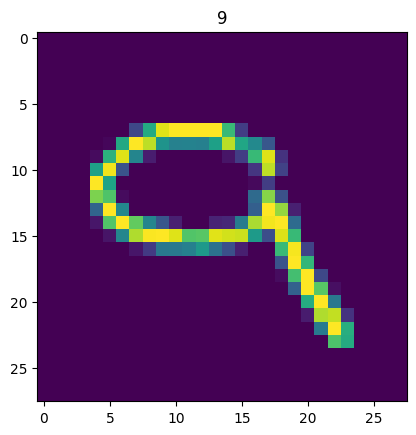

In [11]:
def get_sample(data):
    sample = data.sample(1).to_numpy().squeeze()
    image, label = sample[:-1].reshape(28, 28, order='F'), sample[-1]
    return image, label

image, label = get_sample(train_data)
plt.imshow(image)
plt.title(label)

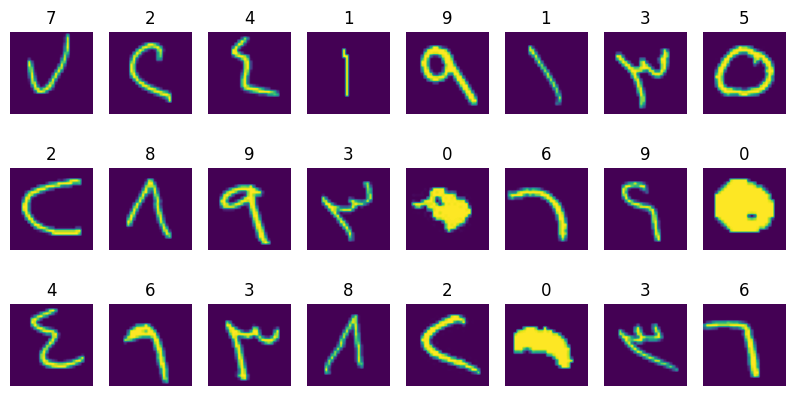

In [12]:
plt.figure(figsize=(10, 5))
 
num_rows = 3
num_cols = 8


for idx in range(num_rows * num_cols):
    image, label = get_sample(train_data)
    
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")

<a id="create"></a>
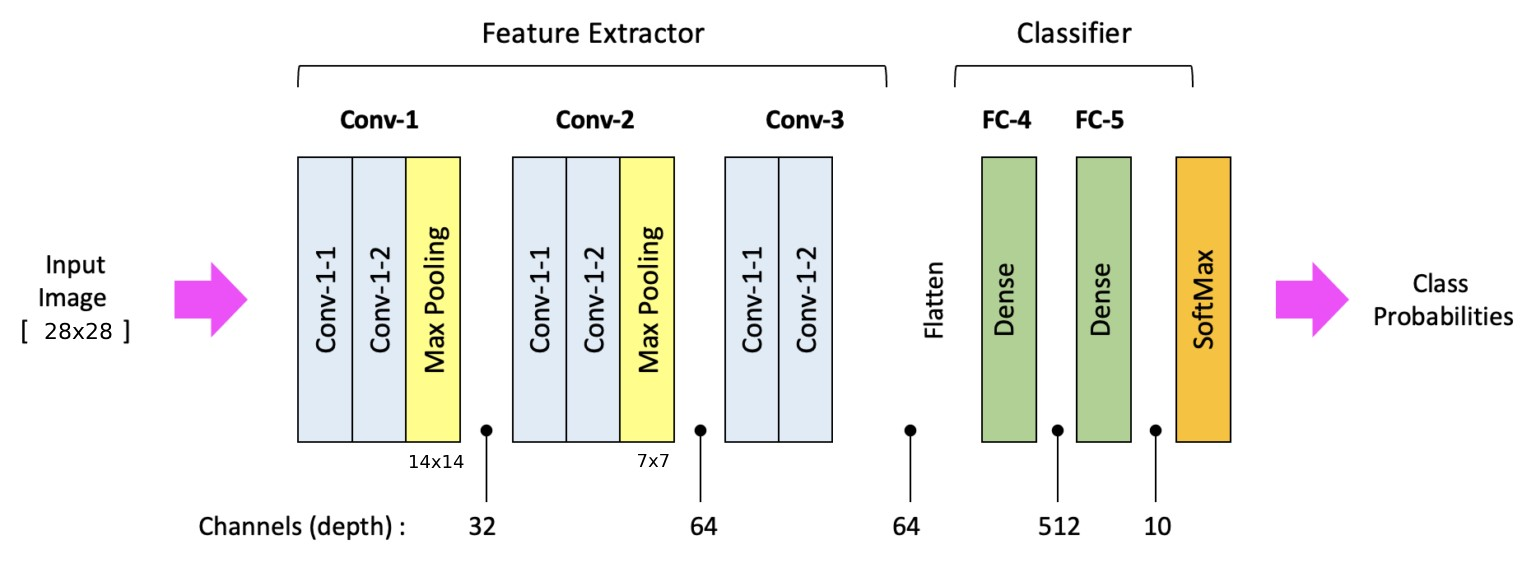
Source: https://learnopencv.com/implementing-cnn-tensorflow-keras/

In [13]:
# Model configs
configs = {
    "batch_size": 32,
    "shuffle": True,
    "epochs": 10
}

<a id="tfmodel"></a>
## TensorFlow Model

<a id="tfcreate"></a>
### Creation

In [14]:
def cnn_tf_model():
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
     
    return model

In [15]:
tf_model = cnn_tf_model()
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [16]:
# Prepping the data
train_data = train_df.to_numpy().reshape(59999, 28, 28)
label_data = to_categorical(train_label)

test_data = test_df.to_numpy().reshape(9999, 28, 28)
label_data_test = to_categorical(test_label)

train_data.shape, label_data.shape, test_data.shape, label_data_test.shape

((59999, 28, 28), (59999, 10), (9999, 28, 28), (9999, 10))

In [17]:
tf_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
             )

history = tf_model.fit(train_data,
          label_data,
          batch_size=configs['batch_size'],
          epochs=configs['epochs'],
          validation_split=.3,
    )

Epoch 1/10
1313/1313 [==============================] - 161s 121ms/step - loss: 0.1270 - accuracy: 0.9720 - val_loss: 0.0397 - val_accuracy: 0.9883
Epoch 2/10
1313/1313 [==============================] - 162s 123ms/step - loss: 0.0349 - accuracy: 0.9898 - val_loss: 0.0447 - val_accuracy: 0.9870
Epoch 3/10
1313/1313 [==============================] - 154s 117ms/step - loss: 0.0304 - accuracy: 0.9914 - val_loss: 0.0333 - val_accuracy: 0.9914
Epoch 4/10
1313/1313 [==============================] - 154s 118ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.0639 - val_accuracy: 0.9868
Epoch 5/10
1313/1313 [==============================] - 153s 117ms/step - loss: 0.0258 - accuracy: 0.9929 - val_loss: 0.0549 - val_accuracy: 0.9850
Epoch 6/10
1313/1313 [==============================] - 152s 116ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.0472 - val_accuracy: 0.9881
Epoch 7/10
1313/1313 [==============================] - 148s 113ms/step - loss: 0.0199 - accuracy: 0.9943 - val_

In [23]:
# Improving the results is out of scope for this assignment
test_loss, test_acc = tf_model.evaluate(test_data, label_data_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 8s 27ms/step - loss: 0.0603 - accuracy: 0.9890
Test accuracy: 98.900


<a id="res"></a>
# Result Evaluation

<a id="conv_hist"></a>
## Model Convergence History

In [24]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, configs['epochs']])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

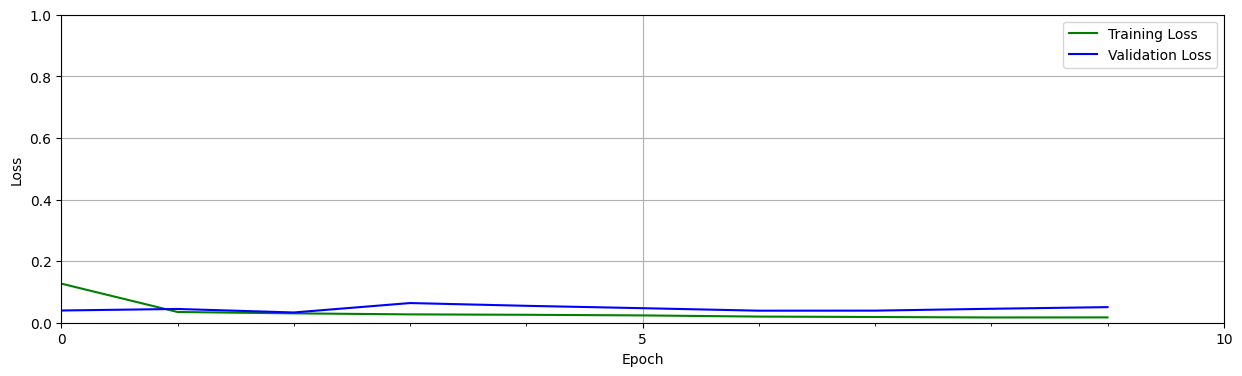

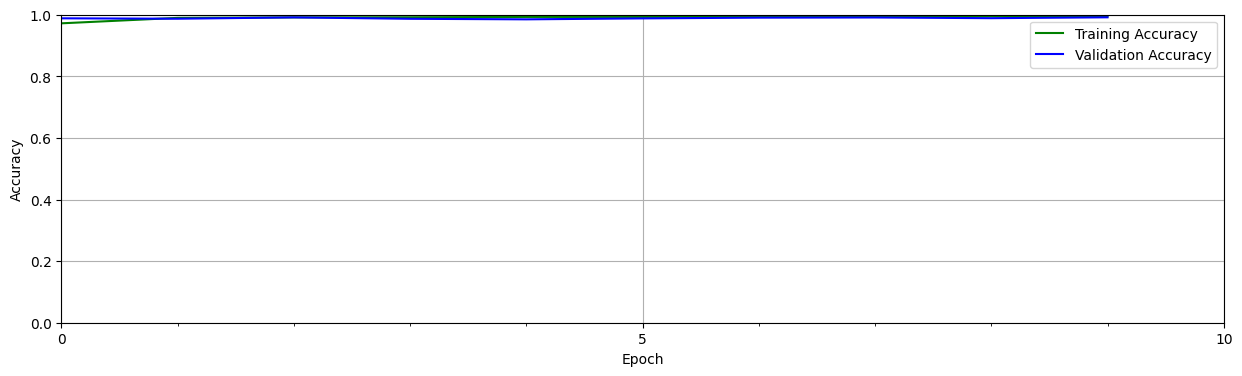

In [151]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 1],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0, 1],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

<a id="sample"></a>
## Predictions on Test Images

In [166]:
def evaluate_model(dataset, labels, model):
    num_rows = 3
    num_cols = 6
    
    random_idx = np.random.randint(0, dataset.shape[0], num_rows*num_cols)
 
    # Retrieve a number of images from the dataset.
    data_batch, labels = dataset[random_idx], labels[random_idx]
    
    # Get predictions from model.  
    predictions = model.predict(data_batch)
    plt.figure(figsize=(20, 8))
    
    num_matches = 0
    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])
        
        pred_idx = predictions[idx]
        max_idx = tf.argmax(pred_idx).numpy()
        
        label_val = labels[idx].nonzero()[0][0]
        
        title = str(max_idx) + " : " + str(label_val)
        title_obj = plt.title(title, fontdict={'fontsize':13})
        
        if label_val == max_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')
                 
        acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)
     
    return

1/1 [==============================] - 0s 41ms/step
Prediction accuracy:  0.94


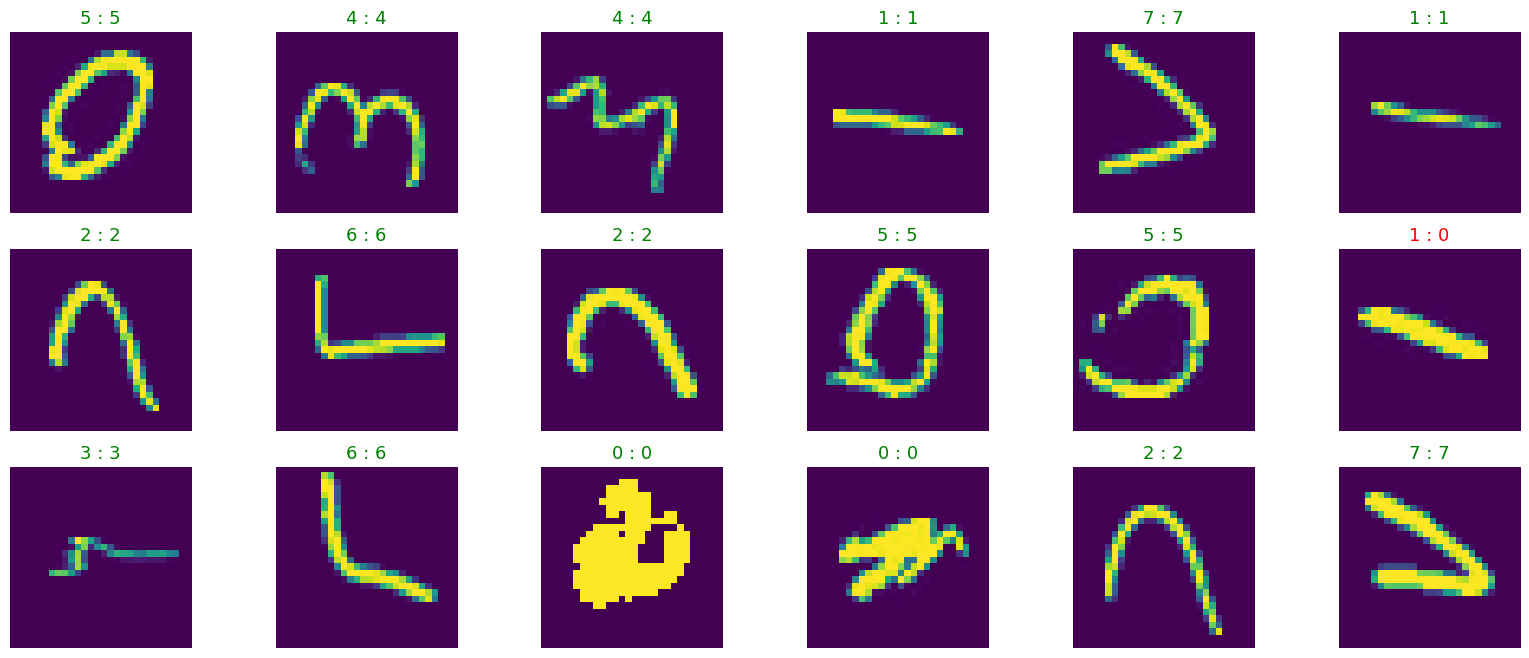

In [167]:
evaluate_model(test_data, label_data_test, tf_model)

<a id="confusion"></a>
## Confusion Matrix

In [168]:
# Generate predictions for the test dataset.
predictions = tf_model.predict(test_data)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 8s 26ms/step


In [169]:
len(predicted_labels), type(predicted_labels[0])

(9999, numpy.int64)